## ***I used 2023-2024 data***

In [2]:
#Import libraries and packages
import pandas as pd
import numpy as np
import math
import datetime as dt
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, r2_score
from sklearn.metrics import mean_poisson_deviance, mean_gamma_deviance, accuracy_score
from sklearn.preprocessing import MinMaxScaler

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM, GRU
from itertools import cycle
import seaborn as sns
import matplotlib.pyplot as plt
# ! pip install plotly
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

In [3]:
#BITCOIN
# Loading the data
bitcoindf = pd.read_csv('/content/BTC-USD (1).csv')
bitcoindf = bitcoindf.rename(columns={'Date': 'date','Open':'open','High':'high','Low':'low','Close':'close',
                                'Adj Close':'adj_close','Volume':'volume'})
bitcoindf.head() #runs the first 5 rows

,date,open,high,low,close,adj_close,volume
0,2023-01-01,16547.914063,16630.439453,16521.234375,16625.080078,16625.080078,9244361700
1,2023-01-02,16625.509766,16759.343750,16572.228516,16688.470703,16688.470703,12097775227
2,2023-01-03,16688.847656,16760.447266,16622.371094,16679.857422,16679.857422,13903079207
3,2023-01-04,16680.205078,16964.585938,16667.763672,16863.238281,16863.238281,18421743322
4,2023-01-05,16863.472656,16884.021484,16790.283203,16836.736328,16836.736328,13692758566


In [4]:
#Ethereum
# Loading the data
ethereumdf = pd.read_csv('/content/ETH-USD (1).csv')
ethereumdf = ethereumdf.rename(columns={'Date': 'date','Open':'open','High':'high','Low':'low','Close':'close',
                                'Adj Close':'adj_close','Volume':'volume'})
ethereumdf.head() #runs the first 5 rows

,date,open,high,low,close,adj_close,volume
0,2023-01-01,1196.713623,1203.475342,1192.885376,1200.964844,1200.964844,2399674550
1,2023-01-02,1201.103271,1219.860596,1195.214966,1214.656616,1214.656616,3765758498
2,2023-01-03,1214.744019,1219.095337,1207.491577,1214.778809,1214.778809,3392972131
3,2023-01-04,1214.718628,1264.807495,1213.168823,1256.526611,1256.526611,6404416893
4,2023-01-05,1256.484619,1258.571533,1245.173096,1250.438599,1250.438599,4001786456


In [5]:
#Dogecoin
# Loading the data
dogecoindf2 = pd.read_csv('/content/DOGE-USD (1).csv')
dogecoindf2 = dogecoindf2.rename(columns={'Date': 'date','Open':'open','High':'high','Low':'low','Close':'close',
                                'Adj Close':'adj_close','Volume':'volume'})
dogecoindf2

,date,open,high,low,close,adj_close,volume
0,2023-01-01,0.070287,0.070685,0.069289,0.070225,0.070225,185279750
1,2023-01-02,0.070225,0.072479,0.069358,0.071454,0.071454,405800240
2,2023-01-03,0.071456,0.072197,0.069774,0.070468,0.070468,283398864
3,2023-01-04,0.070468,0.073250,0.070310,0.073237,0.073237,343264145
4,2023-01-05,0.073233,0.075027,0.071400,0.071550,0.071550,424927580
...,...,...,...,...,...,...,...
513,2024-05-28,0.169090,0.169330,0.161796,0.164962,0.164962,1410223091
514,2024-05-29,0.164964,0.170269,0.162220,0.163695,0.163695,1525668595
515,2024-05-30,0.163696,0.165407,0.156595,0.159544,0.159544,1452218159
516,2024-05-31,0.159539,0.162226,0.154907,0.159136,0.159136,945969518


In [6]:
print ("les dimensions du dogecoindf  sont : ",dogecoindf2.shape)

les dimensions du dogecoindf  sont :  (518, 7)


In [7]:
# affiche des informations générales sur dataframe dogecoindf
dogecoindf2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 518 entries, 0 to 517
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   date       518 non-null    object 
 1   open       518 non-null    float64
 2   high       518 non-null    float64
 3   low        518 non-null    float64
 4   close      518 non-null    float64
 5   adj_close  518 non-null    float64
 6   volume     518 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 28.5+ KB


#### **No null values**

# **Preprocessing Data**

Text(0.5, 1.0, 'Ethereum Close Price')

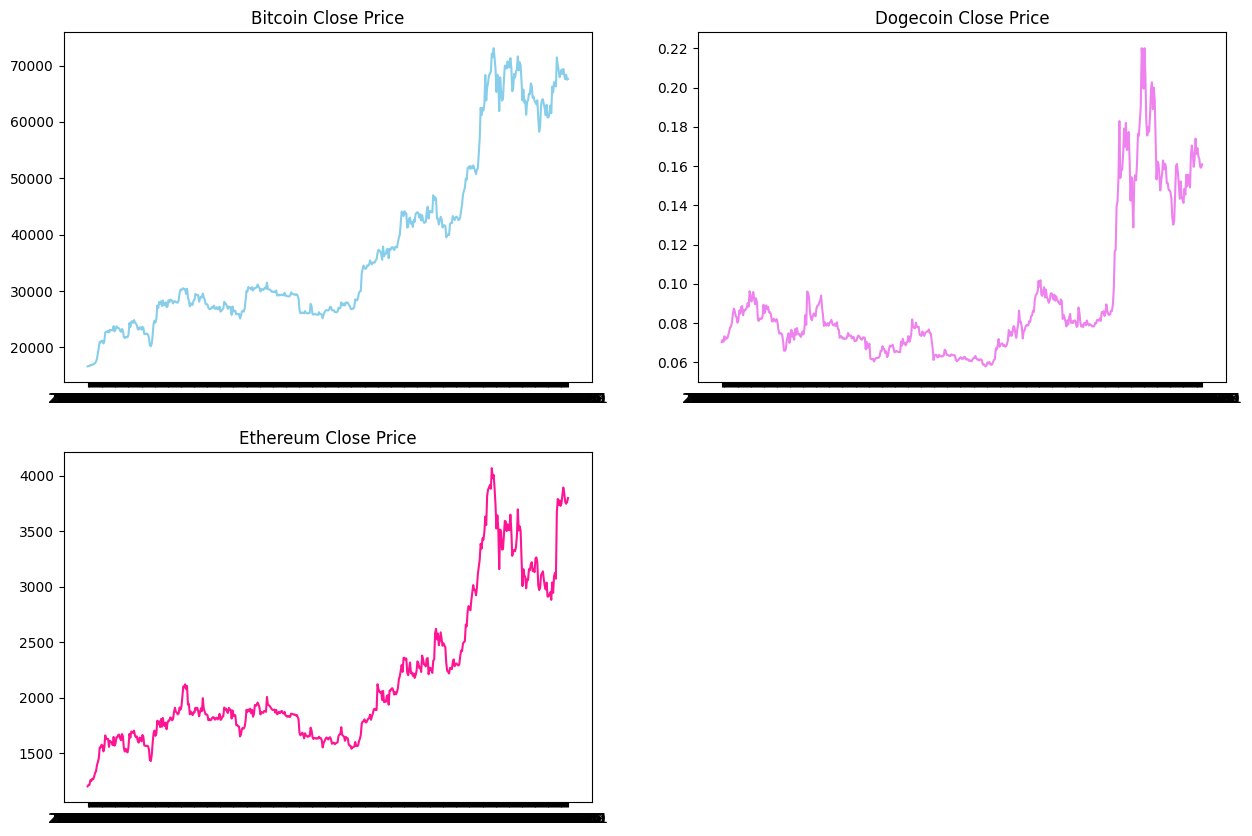

In [ ]:
#Plotting close price of Bitcoin, Dogecoin and Ethereum
fig = plt.figure(figsize = (15,10))
plt.subplot(2, 2, 1)
plt.plot(bitcoindf['date'], bitcoindf['close'], color="skyblue")
plt.title('Bitcoin Close Price')

plt.subplot(2, 2, 2)
plt.plot(dogecoindf2['date'], dogecoindf2['close'], color="violet")
plt.title('Dogecoin Close Price')

plt.subplot(2, 2, 3)
plt.plot(ethereumdf['date'], ethereumdf['close'], color="deeppink")
plt.title('Ethereum Close Price')

In [8]:
# convert date field from string to Date format and make it index
dogecoindf2['date'] = pd.to_datetime(dogecoindf2.date)

In [ ]:
#Monthwise comparision between Stock actual, open and close price
monthvise_dogecoin= dogecoindf2.groupby(dogecoindf2['date'].dt.strftime('%B'))[['open','close']].mean().sort_values(by='close')
monthvise_dogecoin.head()

,open,close
date,,
September,0.062208,0.062153
October,0.062465,0.062655
June,0.068756,0.068645
August,0.069525,0.069073
July,0.070549,0.070914


# **Close price prediction preparation**

In [9]:
closedf = dogecoindf2[['date','close']]
print("Shape of close dataframe:", closedf.shape)
print(closedf)

Shape of close dataframe: (518, 2)
          date     close
0   2023-01-01  0.070225
1   2023-01-02  0.071454
2   2023-01-03  0.070468
3   2023-01-04  0.073237
4   2023-01-05  0.071550
..         ...       ...
513 2024-05-28  0.164962
514 2024-05-29  0.163695
515 2024-05-30  0.159544
516 2024-05-31  0.159136
517 2024-06-01  0.160838

[518 rows x 2 columns]


In [10]:
close_stock = closedf.copy()
del closedf['date']
scaler=MinMaxScaler(feature_range=(0,1))
closedf=scaler.fit_transform(np.array(closedf).reshape(-1,1))
print(closedf.shape)

(518, 1)


In [11]:
training_size=int(len(closedf)*0.64)
test_size=len(closedf)-training_size
train_data,test_data=closedf[0:training_size,:],closedf[training_size:len(closedf),:1]
print("train_data: ", train_data.shape)
print("test_data: ", test_data.shape)

train_data:  (331, 1)
test_data:  (187, 1)


In [12]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [13]:
time_step = 3
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

print("X_train: ", X_train.shape)
print("y_train: ", y_train.shape)
print("X_test: ", X_test.shape)
print("y_test", y_test.shape)

X_train:  (327, 3)
y_train:  (327,)
X_test:  (183, 3)
y_test (183,)


# **LSTM**

In [14]:
# reshape input to be [samples, time steps, features]
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

print("X_train: ", X_train.shape)
print("X_test: ", X_test.shape)

X_train:  (327, 3, 1)
X_test:  (183, 3, 1)


In [15]:
tf.keras.backend.clear_session()
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(time_step,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [16]:
history = model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=200,batch_size=5,verbose=1)

Epoch 1/200
66/66 ━━━━━━━━━━━━━━━━━━━━ 7s 16ms/step - loss: 0.0049 - val_loss: 0.0887
Epoch 2/200
66/66 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0014 - val_loss: 0.0047
Epoch 3/200
66/66 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 5.8249e-04 - val_loss: 0.0060
Epoch 4/200
66/66 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 4.4692e-04 - val_loss: 0.0053
Epoch 5/200
66/66 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 5.6491e-04 - val_loss: 0.0104
Epoch 6/200
66/66 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 4.2061e-04 - val_loss: 0.0061
Epoch 7/200
66/66 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 4.8493e-04 - val_loss: 0.0118
Epoch 8/200
66/66 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 5.0854e-04 - val_loss: 0.0067
Epoch 9/200
66/66 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 4.2854e-04 - val_loss: 0.0090
Epoch 10/200
66/66 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 4.6425e-04 - val_loss: 0.0077
Epoch 11/200
66/66 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 3.7946e-04 - val_loss: 0.0137
Epoch 12/200
66/66 ━━━━━━

In [17]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)
train_predict.shape, test_predict.shape

11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 68ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


((327, 1), (183, 1))

In [18]:
# Transform back to original form

train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
original_ytrain = scaler.inverse_transform(y_train.reshape(-1,1))
original_ytest = scaler.inverse_transform(y_test.reshape(-1,1))

In [19]:
train_score = model.evaluate(X_train, y_train)
test_score = model.evaluate(X_test, y_test)
print('Train Loss:', train_score)
print('Test Loss:', test_score)

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.0890e-04 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0163     
Train Loss: 0.00024290398869197816
Test Loss: 0.02939545549452305


In [20]:
# Evaluation metrices RMSE and MAE
print("Train data RMSE: ", math.sqrt(mean_squared_error(original_ytrain,train_predict)))
print("Train data MSE: ", mean_squared_error(original_ytrain,train_predict))
print("Test data MAE: ", mean_absolute_error(original_ytrain,train_predict))
print("-------------------------------------------------------------------------------------")
print("Test data RMSE: ", math.sqrt(mean_squared_error(original_ytest,test_predict)))
print("Test data MSE: ", mean_squared_error(original_ytest,test_predict))
print("Test data MAE: ", mean_absolute_error(original_ytest,test_predict))

Train data RMSE:  0.002527434128243314
Train data MSE:  6.3879232726090396e-06
Test data MAE:  0.001710730527425031
-------------------------------------------------------------------------------------
Test data RMSE:  0.027803701154789685
Test data MSE:  0.0007730457979048533
Test data MAE:  0.01976772568952842


### The model learned well on the training data but the model's performance on unseen data is worse than on the training data.

### Sign of overfitting

In [21]:
print("Train data explained variance regression score:", explained_variance_score(original_ytrain, train_predict))
print("Test data explained variance regression score:", explained_variance_score(original_ytest, test_predict))

Train data explained variance regression score: 0.9259084526561134
Test data explained variance regression score: 0.7660316632801957


In [22]:
print("Train data R2 score:", r2_score(original_ytrain, train_predict))
print("Test data R2 score:", r2_score(original_ytest, test_predict))

Train data R2 score: 0.9238139743155758
Test data R2 score: 0.5427243044387069


### **the drop from 0.92 to 0.54 indicates that the model may be overfitting, as it performs better on the training data compared to the test data.**

In [23]:
# shift train predictions for plotting

look_back=time_step
trainPredictPlot = np.empty_like(closedf)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
print("Train predicted data: ", trainPredictPlot.shape)

# shift test predictions for plotting
testPredictPlot = np.empty_like(closedf)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(closedf)-1, :] = test_predict
print("Test predicted data: ", testPredictPlot.shape)
names = cycle(['Original close price','Train predicted close price','Test predicted close price'])


plotdf = pd.DataFrame({'date': close_stock['date'],
                       'original_close': close_stock['close'],
                      'train_predicted_close': trainPredictPlot.reshape(1,-1)[0].tolist(),
                      'test_predicted_close': testPredictPlot.reshape(1,-1)[0].tolist()})

fig = px.line(plotdf,x=plotdf['date'], y=[plotdf['original_close'],plotdf['train_predicted_close'],
                                          plotdf['test_predicted_close']],
              labels={'value':'Stock price','date': 'Date'})
fig.update_layout(title_text='Comparision between original close price vs predicted close price',
                  plot_bgcolor='white', font_size=15, font_color='black', legend_title_text='Close Price')
fig.for_each_trace(lambda t:  t.update(name = next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

Train predicted data:  (518, 1)
Test predicted data:  (518, 1)


In [ ]:
#to check the values of loss for both training and testing sets
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_loss
val_loss

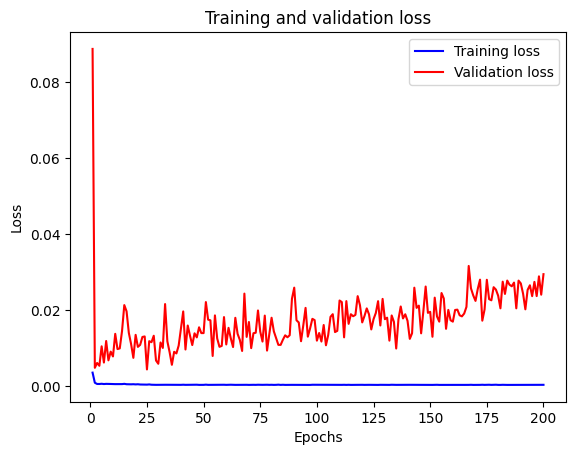

In [32]:
import matplotlib.pyplot as plt

# Assuming 'history' is the history object returned by model.fit()
train_loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(train_loss) + 1)

# Plotting the learning curve
plt.plot(epochs, train_loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


### Sign of overfitting , the validation loss is higher than the training loss

# **Cross-Validation + Dropout for LSTM**

Cross-validation helps lessen the risk of overfitting detected above by providing multiple estimates of the model's performance across different subsets of the data.

dropout helps prevent the model from memorizing noise or irrelevant patterns in the training data, thus improving its ability to generalize to unseen data.

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import KFold
from keras.models import Sequential
from keras.layers import Activation, Dense, LSTM, Dropout
import numpy as np

# Initialize KFold cross-validation
kfold = KFold(n_splits=10, shuffle=True, random_state=7)
cvscores = []

# Ensure x and y are numpy arrays of closedf
x = np.array(closedf)
y = np.array(closedf)

# Define the sequence length
sequence_length = 3

# Lists to store X_train, y_train, X_test, and y_test for each fold
X_train_list = []
y_train_list = []
X_test_list = []
y_test_list = []

# Iterate over each fold
for train_index, test_index in kfold.split(x):
    # Manual split based on the training_size ratio
    training_size = int(len(train_index) * 0.64)
    test_size = len(train_index) - training_size
    train_data = x[train_index][:training_size]
    test_data = x[train_index][training_size:training_size + test_size]

    # Reshape data for LSTM input
    if len(train_data) % sequence_length != 0:
        train_data = train_data[:len(train_data) // sequence_length * sequence_length]
    if len(test_data) % sequence_length != 0:
        test_data = test_data[:len(test_data) // sequence_length * sequence_length]

    X_train = np.reshape(train_data, (train_data.shape[0] // sequence_length, sequence_length, 1))
    y_train = np.reshape(train_data, (train_data.shape[0] // sequence_length, sequence_length, 1))
    X_test = np.reshape(test_data, (test_data.shape[0] // sequence_length, sequence_length, 1))
    y_test = np.reshape(test_data, (test_data.shape[0] // sequence_length, sequence_length, 1))

    # Store X_train, y_train, X_test, and y_test in the lists
    X_train_list.append(X_train)
    y_train_list.append(y_train)
    X_test_list.append(X_test)
    y_test_list.append(y_test)

    # Define model architecture
    model = Sequential()
    model.add(LSTM(100, return_sequences=True, input_shape=(sequence_length, 1)))
    model.add(LSTM(90))
    model.add(Dropout(0.25))
    model.add(Dense(units=1))
    model.add(Activation("tanh"))
    model.compile(loss='mean_squared_error', optimizer='adam', metrics=["mae"])

    # Train the model
    model.fit(X_train, y_train, epochs=10, batch_size=10, verbose=0)

    # Evaluate the model
    scores = model.evaluate(X_test, y_test, verbose=0)
    print("%s: %.2f%%" % (model.metrics_names[1], scores[1] * 100))
    cvscores.append(scores[1] * 100)

print("%.2f%% (+/- %.2f%%)" % (np.mean(cvscores), np.std(cvscores)))

# After the loop, you can access X_train_list, y_train_list, X_test_list, and y_test_list
# For example, to access X_train and y_train of the first fold:
X_train_first_fold = X_train_list[0]
y_train_first_fold = y_train_list[0]
X_test_first_fold = X_test_list[0]
y_test_first_fold = y_test_list[0]


mae: 4.23%
mae: 4.17%
mae: 4.66%
mae: 5.35%
mae: 4.66%
mae: 5.13%
mae: 4.48%
mae: 4.91%
mae: 5.15%
mae: 4.17%
4.69% (+/- 0.41%)


The model has an average MAE of 4.69%

The standard deviation of 0.41% indicates that the model's performance is relatively stable across different folds of the data

In [ ]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train_first_fold)
test_predict=model.predict(X_test_first_fold)
train_predict.shape, test_predict.shape

2/2 [==============================] - 0s 8ms/step


((99, 1), (56, 1))

In [ ]:
# Transform back to original form

train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
original_ytrain = scaler.inverse_transform(y_train_first_fold.reshape(-1,1))
original_ytest = scaler.inverse_transform(y_test_first_fold.reshape(-1,1))

In [ ]:
train_score = model.evaluate(X_train, y_train)
test_score = model.evaluate(X_test, y_test)
print('Train Loss:', train_score)
print('Test Loss:', test_score)

2/2 [==============================] - 0s 8ms/step - loss: 0.0044 - mae: 0.0417
Train Loss: [0.00012865035387221724, 0.00721924751996994]
Test Loss: [0.004414141643792391, 0.04174499958753586]


In [ ]:
train_predict.shape , test_predict.shape , original_ytrain.shape, original_ytest.shape

((99, 1), (56, 1), (297, 1), (168, 1))

# **GRU**

In [35]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

print("X_train: ", X_train.shape)
print("X_test: ", X_test.shape)

X_train:  (327, 3, 1)
X_test:  (183, 3, 1)


In [36]:
tf.keras.backend.clear_session()
model=Sequential()
model.add(GRU(50,return_sequences=True,input_shape=(time_step,1)))
model.add(GRU(50,return_sequences=True))
model.add(GRU(50,return_sequences=True))
model.add(GRU(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



In [37]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ gru (GRU)                            │ (None, 3, 50)               │           7,950 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_1 (GRU)                          │ (None, 3, 50)               │          15,300 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_2 (GRU)                          │ (None, 3, 50)               │          15,300 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_3 (GRU)                          │ (None, 50)                  │          15,300 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 53,901 (210.55 KB)

 Trainable params: 53,901 (210.55 KB)

 Non-trainable params: 0 (0.00 B)

In [38]:
history2 = model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=200,batch_size=5,verbose=1)

Epoch 1/200
66/66 ━━━━━━━━━━━━━━━━━━━━ 13s 24ms/step - loss: 0.0039 - val_loss: 0.0087
Epoch 2/200
66/66 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 5.6002e-04 - val_loss: 0.0055
Epoch 3/200
66/66 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 4.1292e-04 - val_loss: 0.0084
Epoch 4/200
66/66 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 4.8268e-04 - val_loss: 0.0075
Epoch 5/200
66/66 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 7.0956e-04 - val_loss: 0.0059
Epoch 6/200
66/66 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 4.7536e-04 - val_loss: 0.0077
Epoch 7/200
66/66 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 4.6434e-04 - val_loss: 0.0049
Epoch 8/200
66/66 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 3.9692e-04 - val_loss: 0.0105
Epoch 9/200
66/66 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 4.1174e-04 - val_loss: 0.0043
Epoch 10/200
66/66 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 4.2672e-04 - val_loss: 0.0038
Epoch 11/200
66/66 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 4.5896e-04 - val_loss: 0.0036
Epoch 12/20

In [39]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)
train_predict.shape, test_predict.shape

11/11 ━━━━━━━━━━━━━━━━━━━━ 4s 188ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step  


((327, 1), (183, 1))

In [40]:
# Transform back to original form

train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
original_ytrain = scaler.inverse_transform(y_train.reshape(-1,1))
original_ytest = scaler.inverse_transform(y_test.reshape(-1,1))

In [41]:
# Evaluation metrices RMSE and MAE
print("Train data RMSE: ", math.sqrt(mean_squared_error(original_ytrain,train_predict)))
print("Train data MSE: ", mean_squared_error(original_ytrain,train_predict))
print("Test data MAE: ", mean_absolute_error(original_ytrain,train_predict))
print("-------------------------------------------------------------------------------------")
print("Test data RMSE: ", math.sqrt(mean_squared_error(original_ytest,test_predict)))
print("Test data MSE: ", mean_squared_error(original_ytest,test_predict))
print("Test data MAE: ", mean_absolute_error(original_ytest,test_predict))

Train data RMSE:  0.002448811661869189
Train data MSE:  5.99667855530654e-06
Test data MAE:  0.0016658331452932562
-------------------------------------------------------------------------------------
Test data RMSE:  0.046308381889636874
Test data MSE:  0.002144466233236448
Test data MAE:  0.03235921291373466


In [43]:
print("Train data explained variance regression score:", explained_variance_score(original_ytrain, train_predict))
print("Test data explained variance regression score:", explained_variance_score(original_ytest, test_predict))

Train data explained variance regression score: 0.9289115333362373
Test data explained variance regression score: 0.3311014643907678


### **33% for the test data is lower score compared to the training data, which suggests that the  model may not generalize well to unseen data.**

In [44]:
# shift train predictions for plotting

look_back=time_step
trainPredictPlot = np.empty_like(closedf)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
print("Train predicted data: ", trainPredictPlot.shape)

# shift test predictions for plotting
testPredictPlot = np.empty_like(closedf)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(closedf)-1, :] = test_predict
print("Test predicted data: ", testPredictPlot.shape)
names = cycle(['Original close price','Train predicted close price','Test predicted close price'])

plotdf = pd.DataFrame({'date': close_stock['date'],
                       'original_close': close_stock['close'],
                      'train_predicted_close': trainPredictPlot.reshape(1,-1)[0].tolist(),
                      'test_predicted_close': testPredictPlot.reshape(1,-1)[0].tolist()})

fig = px.line(plotdf,x=plotdf['date'], y=[plotdf['original_close'],plotdf['train_predicted_close'],
                                          plotdf['test_predicted_close']],
              labels={'value':'Stock price','date': 'Date'})
fig.update_layout(title_text='Comparision between original close price vs predicted close price',  plot_bgcolor='white', font_size=15, font_color='black',legend_title_text='Close Price')
fig.for_each_trace(lambda t:  t.update(name = next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

Train predicted data:  (518, 1)
Test predicted data:  (518, 1)


In [45]:
x_input=test_data[len(test_data)-time_step:].reshape(1,-1)
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]
n_steps=time_step
i=0
pred_days = 10
while(i<pred_days):

    if(len(temp_input)>time_step):
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input = x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))

        yhat = model.predict(x_input, verbose=0)
        #print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)

        lst_output.extend(yhat.tolist())
        i=i+1

    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        temp_input.extend(yhat[0].tolist())

        lst_output.extend(yhat.tolist())
        i=i+1

print("Output of predicted next days: ", len(lst_output))

1 day input [0.62428854 0.6347839  0.27935994]
2 day input [ 0.6347839   0.27935994 -0.07172707]
3 day input [ 0.27935994 -0.07172707 -0.08714764]
4 day input [-0.07172707 -0.08714764 -0.11605462]
5 day input [-0.08714764 -0.11605462 -0.07325995]
6 day input [-0.11605462 -0.07325995 -0.04972241]
7 day input [-0.07325995 -0.04972241 -0.01644333]
8 day input [-0.04972241 -0.01644333 -0.00296471]
9 day input [-0.01644333 -0.00296471  0.00998903]
Output of predicted next days:  10


In [46]:
last_days=np.arange(1,time_step+1)
day_pred=np.arange(time_step+1,time_step+pred_days+1)
print(last_days)
print(day_pred)

[1 2 3]
[ 4  5  6  7  8  9 10 11 12 13]


In [47]:
temp_mat = np.empty((len(last_days)+pred_days+1,1))
temp_mat[:] = np.nan
temp_mat = temp_mat.reshape(1,-1).tolist()[0]

last_original_days_value = temp_mat
next_predicted_days_value = temp_mat

last_original_days_value[0:time_step+1] = scaler.inverse_transform(closedf[len(closedf)-time_step:]).reshape(1,-1).tolist()[0]
next_predicted_days_value[time_step+1:] = scaler.inverse_transform(np.array(lst_output).reshape(-1,1)).reshape(1,-1).tolist()[0]
new_pred_plot = pd.DataFrame({
    'last_original_days_value':last_original_days_value,
    'next_predicted_days_value':next_predicted_days_value
})
names = cycle(['Last 15 days close price','Predicted next 10 days close price'])

fig = px.line(new_pred_plot,x=new_pred_plot.index, y=[new_pred_plot['last_original_days_value'],
                                                      new_pred_plot['next_predicted_days_value']],
              labels={'value': 'Stock price','index': 'Timestamp'})
fig.update_layout(title_text='Compare last 15 days vs next 10 days',
                  plot_bgcolor='white', font_size=15, font_color='black', legend_title_text='Close Price')
fig.for_each_trace(lambda t:  t.update(name = next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

In [48]:
grudf=closedf.tolist()
grudf.extend((np.array(lst_output).reshape(-1,1)).tolist())
grudf=scaler.inverse_transform(grudf).reshape(1,-1).tolist()[0]

names = cycle(['Close price'])
fig = px.line(grudf,labels={'value': 'Stock price','index': 'Timestamp'})
fig.update_layout(title_text='Plotting whole closing stock price with prediction',
                  plot_bgcolor='white', font_size=15, font_color='black',legend_title_text='Stock')
fig.for_each_trace(lambda t:  t.update(name = next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

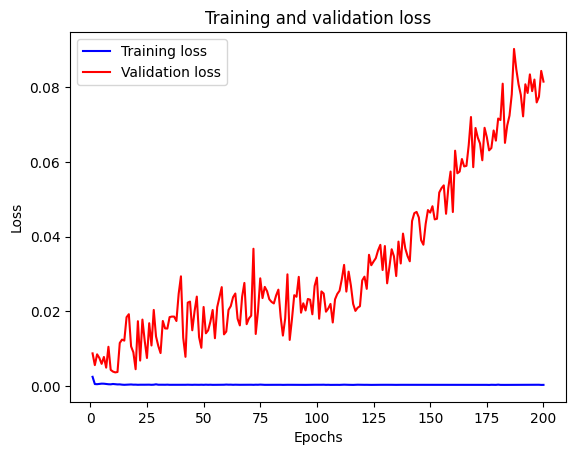

In [49]:
# Assuming 'history' is the history object returned by model.fit()
train_loss = history2.history['loss']
val_loss = history2.history['val_loss']
epochs = range(1, len(train_loss) + 1)

# Plotting the learning curve
plt.plot(epochs, train_loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


### **Same as LSTM, the training loss of the GRU model is much lower than the validation loss => sigh of overfitting because the model is performing very well on the trainig data but struggles to generalize to new and unseen data **

# **Code enhancement: Adding Regularization and eraly-stopping to the GRU model**

I added regularization techniques L2 to prevent overfitting detected above.

I used early stopping to monitor the validation loss and stop training when it starts increasing.

In [50]:
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import regularizers

# Clear previous session
tf.keras.backend.clear_session()

# Create GRU model with regularization
model = Sequential()
model.add(GRU(50, return_sequences=True, input_shape=(time_step, 1), kernel_regularizer=regularizers.l2(0.01)))
model.add(GRU(50, return_sequences=True, kernel_regularizer=regularizers.l2(0.01)))
model.add(GRU(50, return_sequences=True, kernel_regularizer=regularizers.l2(0.01)))
model.add(GRU(50, kernel_regularizer=regularizers.l2(0.01)))
model.add(Dense(1))

# Compile the model
model.compile(loss='mean_squared_error', optimizer='adam')

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Fit the model with early stopping
history2 = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=200, batch_size=5, verbose=1, callbacks=[early_stopping])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Epoch 1/200
66/66 ━━━━━━━━━━━━━━━━━━━━ 10s 25ms/step - loss: 1.7440 - val_loss: 0.7961
Epoch 2/200
66/66 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.4697 - val_loss: 0.3317
Epoch 3/200
66/66 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.1065 - val_loss: 0.1936
Epoch 4/200
66/66 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.0216 - val_loss: 0.1665
Epoch 5/200
66/66 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0061 - val_loss: 0.1755
Epoch 6/200
66/66 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0037 - val_loss: 0.1707
Epoch 7/200
66/66 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0035 - val_loss: 0.1720
Epoch 8/200
66/66 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0030 - val_loss: 0.1496
Epoch 9/200
66/66 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0037 - val_loss: 0.1593
Epoch 10/200
66/66 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0036 - val_loss: 0.1783
Epoch 11/200
66/66 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0033 - val_loss: 0.1639
Epoch 12/200
66/66 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/ste

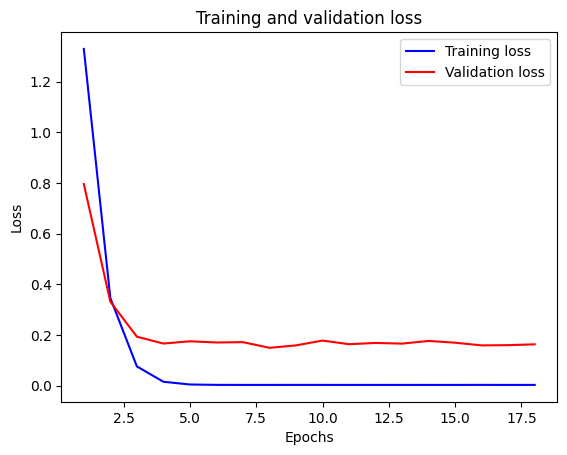

In [51]:
# Assuming 'history' is the history object returned by model.fit()
train_loss = history2.history['loss']
val_loss = history2.history['val_loss']
epochs = range(1, len(train_loss) + 1)

# Plotting the learning curve
plt.plot(epochs, train_loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


The training loss reaching zero suggests that the model has essentially memorized the training data, which could be a sign of overfitting

The decreasing validation loss indicates that the model's performance on unseen data is improving, which is a positive sign. However, the validation loss reaches a point where it starts stabilizing. This stabilization suggests that the model's generalization performance may have peaked at 0.2

# **Bonus: SARIMA Model**

In [59]:
time_step = 3
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

print("X_train: ", X_train.shape)
print("y_train: ", y_train.shape)
print("X_test: ", X_test.shape)
print("y_test", y_test.shape)

X_train:  (327, 3)
y_train:  (327,)
X_test:  (183, 3)
y_test (183,)


In [61]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Define SARIMA model parameters (p, d, q, P, D, Q, s)
p = 1  # AR parameter
d = 1  # Differencing parameter
q = 1  # MA parameter
P = 1  # Seasonal AR parameter
D = 1  # Seasonal differencing parameter
Q = 1  # Seasonal MA parameter
s = 12  # Seasonal period (e.g., 12 for monthly data with yearly seasonality)

# Create and fit SARIMA model
model = SARIMAX(y_train, exog=X_train, order=(p, d, q), seasonal_order=(P, D, Q, s))
history3 = result = model.fit()

# Forecast
forecast = result.forecast(steps=len(X_test), exog=X_test)

# Evaluate the forecast
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, forecast)
print("Mean Squared Error:", mse)


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Mean Squared Error: 0.20033809834083016


Mean Absolute Error (MAE): 0.33227653036174387
Root Mean Squared Error (RMSE): 0.44759144131767103
R-squared (R2): -2.116458926109106


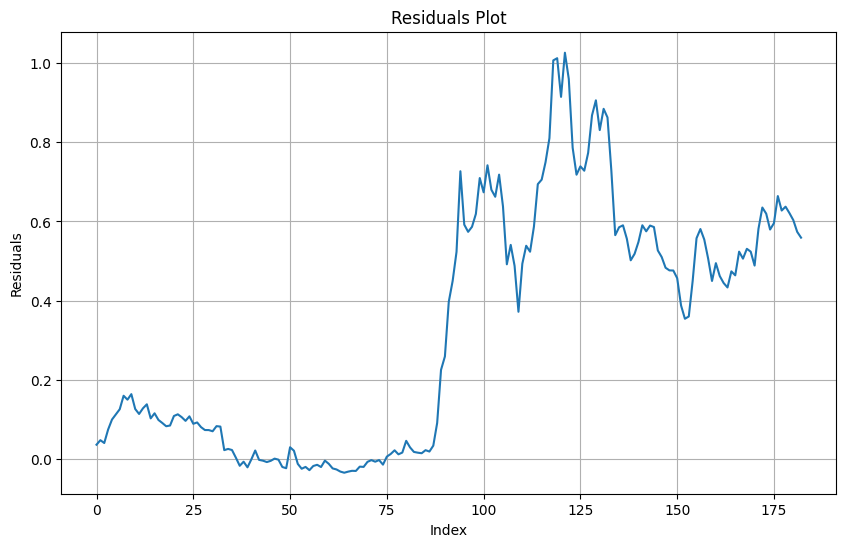

In [65]:
# Importing necessary libraries
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, forecast)
print("Mean Absolute Error (MAE):", mae)

# Root Mean Squared Error (RMSE)
rmse = np.sqrt(mean_squared_error(y_test, forecast))
print("Root Mean Squared Error (RMSE):", rmse)

# Residual Analysis
residuals = y_test - forecast
# Plotting residuals
plt.figure(figsize=(10, 6))
plt.plot(residuals)
plt.title('Residuals Plot')
plt.xlabel('Index')
plt.ylabel('Residuals')
plt.grid(True)
plt.show()


The model initially performed well in capturing the variability in the data, as indicated by the low residuals.

Tthe peak around index 85 indicates a period where the model's predictions deviated significantly from the actual values, resulting in higher residuals. This could indicate that there was a specific pattern or event in the data that the model struggled to capture accurately.

The subsequent decrease in residuals suggests that the model improved its predictions after the peak but still had some degree of error.